# **Introducción y selección de la variable**

Estamos trabajando con un dataset de una empresa que recolecta los datos de los relojes inteligentes y dispositivos moviles para procesarlos y ofrecer una plataforma de premios por alcanzar metas en la realización de retos deportivos.

Vamos a seleccionar cómo variable a explorar la **DistanceInMeters**

Esta variable representa la distancia recorrida por el usuario en metros cómo unidad de medida

# **Explicación de su importancia**

Esta variable es esencial para validar la autenticidad de una actividad de running ya que permite evaluar la coherencia con otras variables cómo la velocidad, pasos, elevación ganada o la duración. Además, permite identificar valores inusuales que no sean humanamente posibles cómo distancias extremadamente altas y así validar si una actividad es realista o presenta inconsistencias en el rendimiento del corredor. Asimismo, se podrían identificar patrones de entrenamiento con el historial de distancias de un usuario para observar anomalías en sus registros.



# **Código en Python con análisis univariado y visualizaciones**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#Código en Python con análisis univariado y visualizaciones
df = pd.read_excel('./DatasetActivities.xlsx')
df.head()


,UserId,Type,Name,StartTimeUtc,DurationInSeconds,DistanceInMeters,Steps,AverageSpeedInMetersPerSecond,AveragePaceInMinutesPerKilometer,TotalElevationGainInMeters,TotalElevationLossInMeters,AverageHeartRateInBeatsPerMinute,SourceType,SourceName,Warnings,CreationTime
0,43696136,Other,Strength,2024-09-30 23:00:59.0000000 +00:00,3426,NaN,24.0,NaN,NaN,NaN,NaN,105.0,Garmin,Forerunner 965,DistanceInMeters,2024-10-01 00:00:23.2330560 +00:00
1,56226720,Running,Avellaneda Carrera,2024-09-30 20:36:15.0000000 +00:00,2308,6050.10,6802.0,2.622,6.356471,127.971985,128.66255,145.0,Garmin,Forerunner 35,NaN,2024-10-01 00:00:32.7421846 +00:00
2,33958672,Running,Malvinas Argentinas Carrera,2024-09-30 23:43:23.0000000 +00:00,232,557.72,600.0,2.399,6.947340,NaN,1.00000,91.0,Garmin,Forerunner 255S Music,DurationLessThanFiveMinutes,2024-10-01 00:00:37.8144259 +00:00
3,33958672,Running,Malvinas Argentinas Carrera,2024-09-30 23:53:23.0000000 +00:00,320,770.48,856.0,2.407,6.924248,3.000000,1.00000,114.0,Garmin,Forerunner 255S Music,NaN,2024-10-01 00:00:52.2962825 +00:00
4,44414656,Walking,Viterbo Caminar,2024-09-30 23:21:36.0000000 +00:00,2248,1836.39,1778.0,0.817,20.399837,41.000000,41.00000,88.0,Garmin,fēnix 3 HR,NaN,2024-10-01 00:00:52.4593847 +00:00


In [ ]:
# Seleccionar solo la actividad de tipo Running
df_running = df[df['Type'] == 'Running'].copy()
df_running.head()

,UserId,Type,Name,StartTimeUtc,DurationInSeconds,DistanceInMeters,Steps,AverageSpeedInMetersPerSecond,AveragePaceInMinutesPerKilometer,TotalElevationGainInMeters,TotalElevationLossInMeters,AverageHeartRateInBeatsPerMinute,SourceType,SourceName,Warnings,CreationTime
1,56226720,Running,Avellaneda Carrera,2024-09-30 20:36:15.0000000 +00:00,2308,6050.10,6802.0,2.622,6.356471,127.971985,128.66255,145.0,Garmin,Forerunner 35,NaN,2024-10-01 00:00:32.7421846 +00:00
2,33958672,Running,Malvinas Argentinas Carrera,2024-09-30 23:43:23.0000000 +00:00,232,557.72,600.0,2.399,6.947340,NaN,1.00000,91.0,Garmin,Forerunner 255S Music,DurationLessThanFiveMinutes,2024-10-01 00:00:37.8144259 +00:00
3,33958672,Running,Malvinas Argentinas Carrera,2024-09-30 23:53:23.0000000 +00:00,320,770.48,856.0,2.407,6.924248,3.000000,1.00000,114.0,Garmin,Forerunner 255S Music,NaN,2024-10-01 00:00:52.2962825 +00:00
6,39156304,Running,Córdoba Carrera,2024-09-30 23:26:07.0000000 +00:00,1895,5005.62,5254.0,2.642,6.308352,96.905790,107.28553,146.0,Garmin,Forerunner 45,NaN,2024-10-01 00:01:02.0718947 +00:00
9,10154408,Running,Rosario Carrera,2024-09-30 21:59:39.0000000 +00:00,4386,10376.22,11452.0,2.365,7.047216,71.099960,71.93257,143.0,Garmin,Forerunner 55,NaN,2024-10-01 00:01:30.1037912 +00:00


In [ ]:
print(f'El número de registros de tipo Running: {len(df_running)}')

El número de registros de tipo Running: 351195


In [ ]:
null_empty = (df_running.isna() | (df_running == "")).sum()
print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')
print(f"Número de registros nulos o vacíos:\n {null_empty}")


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Número de registros nulos o vacíos:
 UserId                                   0
Type                                     0
Name                                     0
StartTimeUtc                             0
DurationInSeconds                        0
DistanceInMeters                       979
Steps                                 4008
AverageSpeedInMetersPerSecond          994
AveragePaceInMinutesPerKilometer      1052
TotalElevationGainInMeters           33316
TotalElevationLossInMeters           32925
AverageHeartRateInBeatsPerMinute     13214
SourceType                               0
SourceName                             999
Warnings                            316327
CreationTime                             0
dtype: int64


In [ ]:
df_running = df_running.dropna(subset=["DistanceInMeters"]).copy()

In [ ]:
# Muestra aleatoria de 100000 registros sin elementos duplicados por "DistanceInMeters"
df_muestra = df_running.sample(n=100000, random_state=42)

Media: 7597.328691476262
Mediana: 6708.12
Moda: 0.0
Desviación estándar: 6691.006560048664
Percentiles:
0.25     3283.6475
0.50     6708.1200
0.75    10092.9125
Name: DistanceInMeters, dtype: float64
Valores atípicos: 12568


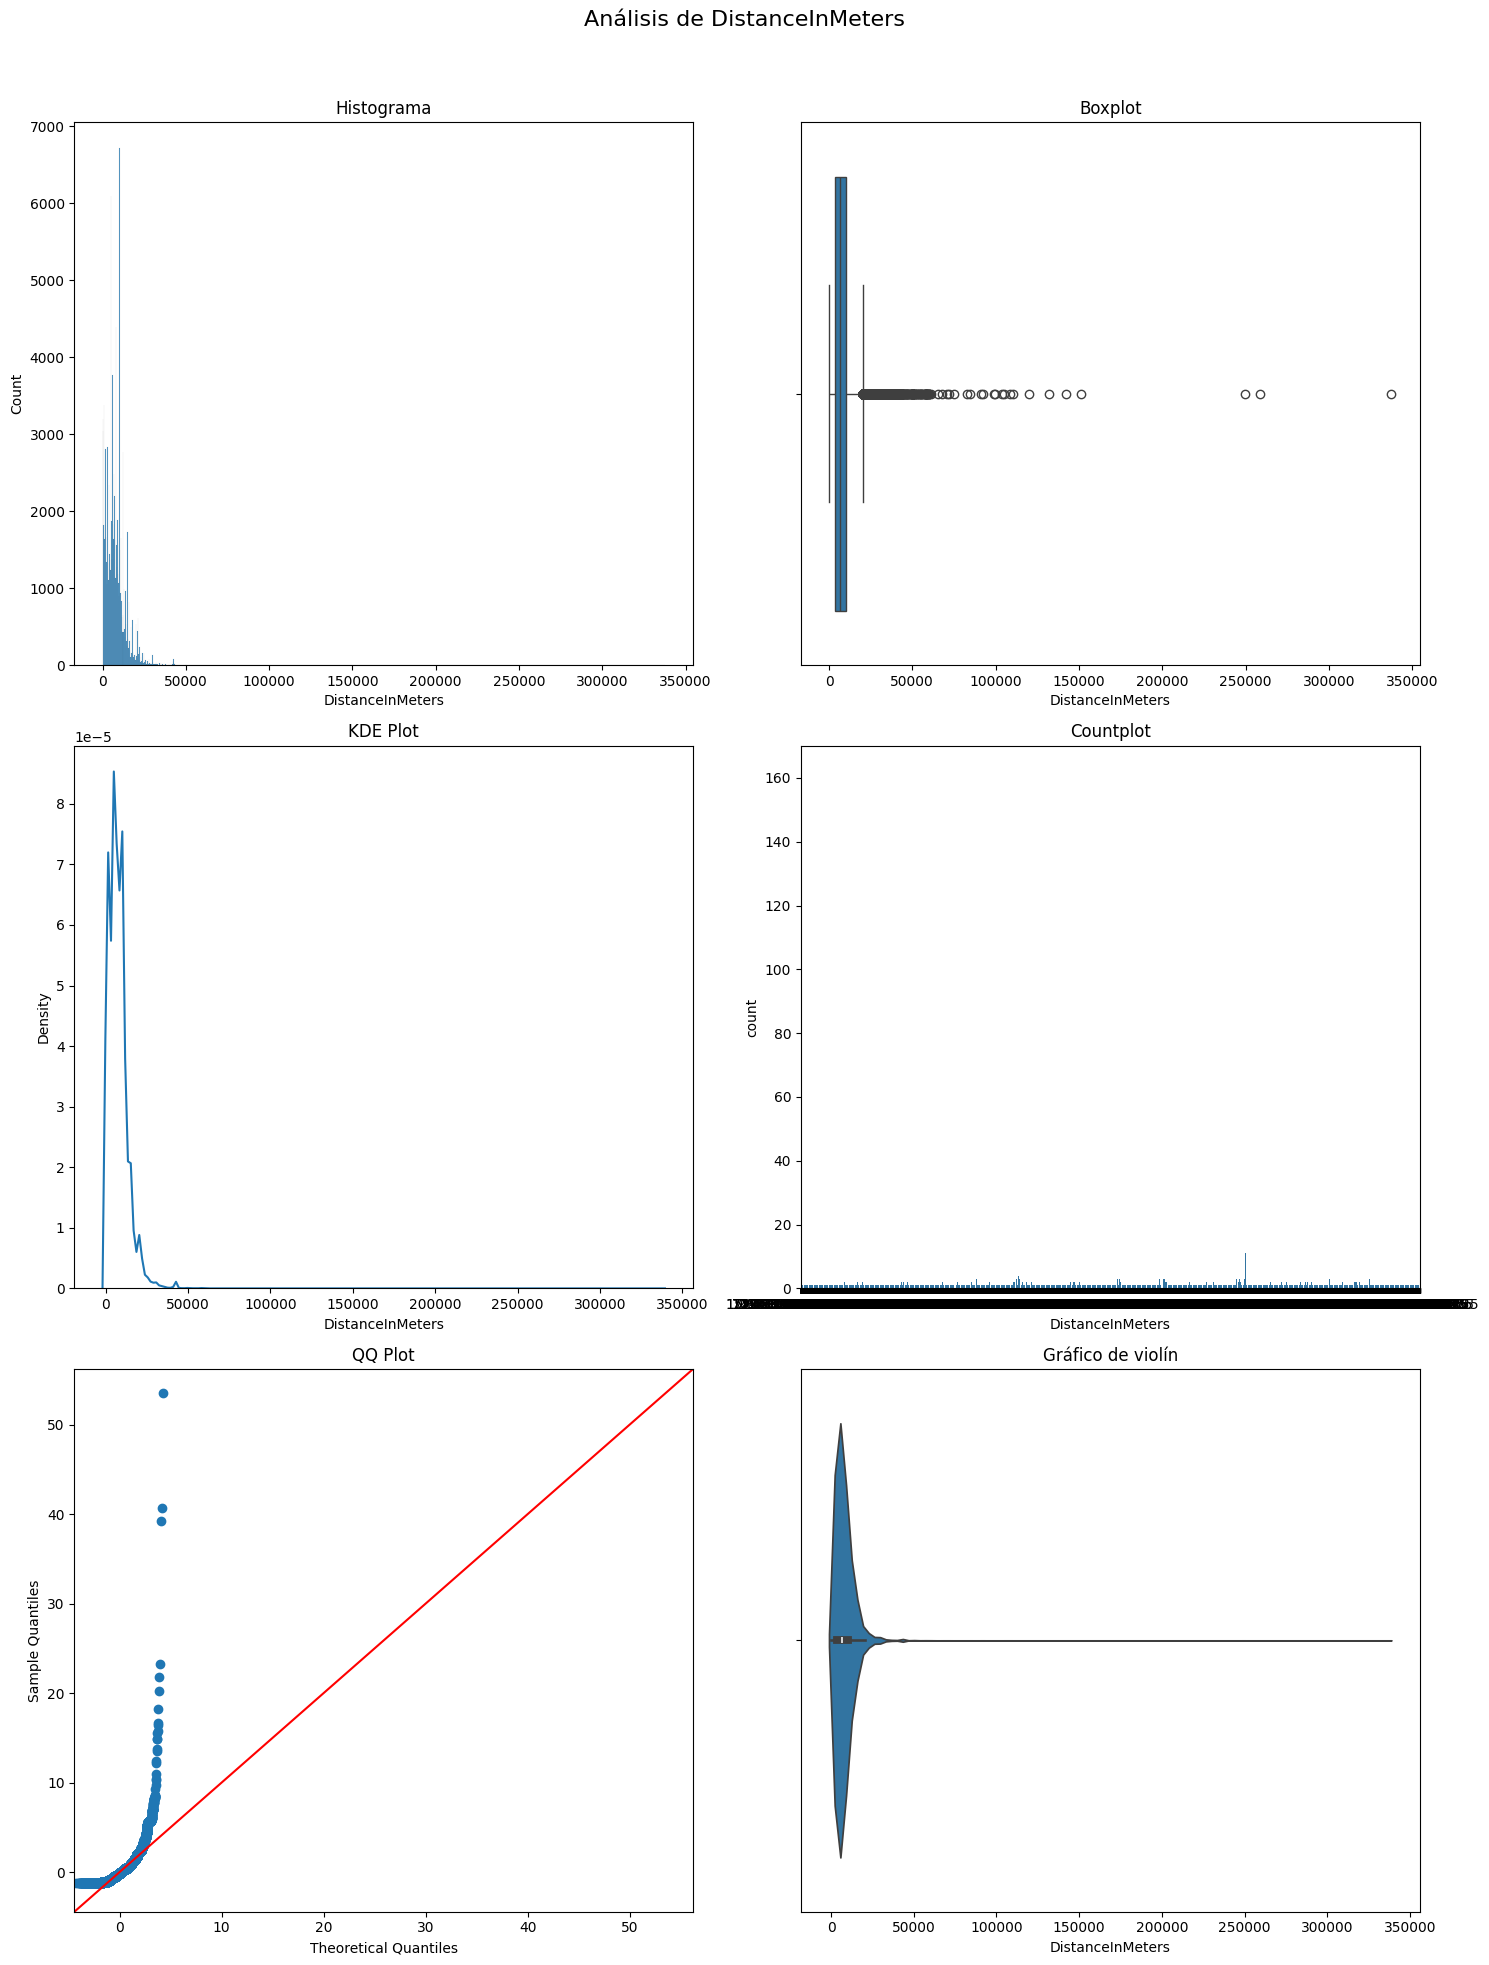

In [ ]:
# Estadísticas básicas para la variable DistanceInMeters
media = df_running["DistanceInMeters"].mean()  # Media
mediana = df_running["DistanceInMeters"].median()  # Mediana
moda = df_running["DistanceInMeters"].mode()[0]  # Moda (si hay varias, toma la primera)
desviacion = df_running["DistanceInMeters"].std()  # Desviación estándar
percentiles = df_running["DistanceInMeters"].quantile([0.25, 0.5, 0.75])  # Percentiles

# Detección de valores atípicos con el método IQR
Q1 = df_running["DistanceInMeters"].quantile(0.25)
Q3 = df_running["DistanceInMeters"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df_running[(df_running["DistanceInMeters"] < limite_inferior) | (df_running["DistanceInMeters"] > limite_superior)]

# Mostrar resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Desviación estándar: {desviacion}")
print(f"Percentiles:\n{percentiles}")
print(f"Valores atípicos: {len(valores_atipicos)}")

# Crear una figura de matriz 2x3
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle(f'Análisis de {"DistanceInMeters"}', fontsize=16)

# Histograma
sns.histplot(df_muestra["DistanceInMeters"], kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histograma')

# Boxplot
sns.boxplot(x=df_muestra["DistanceInMeters"], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot')

# KDE Plot
sns.kdeplot(df_muestra["DistanceInMeters"], ax=axes[1, 0])
axes[1, 0].set_title('KDE Plot')

# Countplot
sns.countplot(x=df_muestra["DistanceInMeters"], ax=axes[1, 1])
axes[1, 1].set_title('Countplot')

# QQ Plot
sm.qqplot(df_muestra["DistanceInMeters"], line='45', fit=True, ax=axes[2, 0])
axes[2, 0].set_title('QQ Plot')

# Gráfico de violín
sns.violinplot(x=df_muestra["DistanceInMeters"], ax=axes[2, 1])
axes[2, 1].set_title('Gráfico de violín')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **Interpretación de los resultados**

Las siguientes gráficas se generaron a partir de una muestra de 100,000 observaciones, limitada por la capacidad de procesamiento.

En el boxplot y la gráfica de violín se observa una alta presencia de valores atípicos, con distancias extremadamente altas. Además, la densidad de los datos en la gráfica de violín muestra una variabilidad entre 0 y aproximadamente 35,000 metros. Por otro lado, en el QQ plot se evidencia que los puntos se desvían de la línea teórica, lo que indica que los datos no siguen una distribución normal y por lo tanto no se podría realizar un análisis lineal de la variable.

En el countplot podemos observar que hay alta variabilidad en el valor de las distancias debido a que son valores flotantes y por lo tanto no son faciles de agrupar.

# **Conclusiones**

● Es importante analizar detenidamente los valores atípicos observados para determinar, en conjunto con el resto de las métricas, si realmente pueden considerarse registros sospechosos o inconsistentes.

● Es importante revisar el comportamiento de la distancia junto con el resto de variables para poder identificar relaciones.

● Además se vio la necesidad eliminar los los registros con distancia nula, ya que se consideran poco útiles para el análisis.


# **Introducción y selección de la variable**

También se realizó el análisis de la columna **SourceType**, la cual es una variable categórica

Esta variable tiene la información del tipo de dispositivo que envió los datos a la plataforma. Y puede tomar los siguientes valores: Garmin, Suunto, Wahoo, Polar, Coros y Apple.

# **Explicación de su importancia**

A nivel producto es muy importante porque está feature la usa la empresa para determinar la marca del dispositivo utilizado por los usuarios. Este permite entender el alcance del mercado y el comportamiento de las poblaciones según el dispositivo.


# **Código en Python con análisis univariado y visualizaciones**


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Frecuencias absolutas:
SourceType
Garmin    321978
Coros      11248
Polar       9628
Wahoo       4287
Suunto      3965
Apple         89
Name: count, dtype: int64
Frecuencias relativas:
SourceType
Garmin    0.916807
Coros     0.032028
Polar     0.027415
Wahoo     0.012207
Suunto    0.011290
Apple     0.000253
Name: proportion, dtype: float64
Moda: Garmin


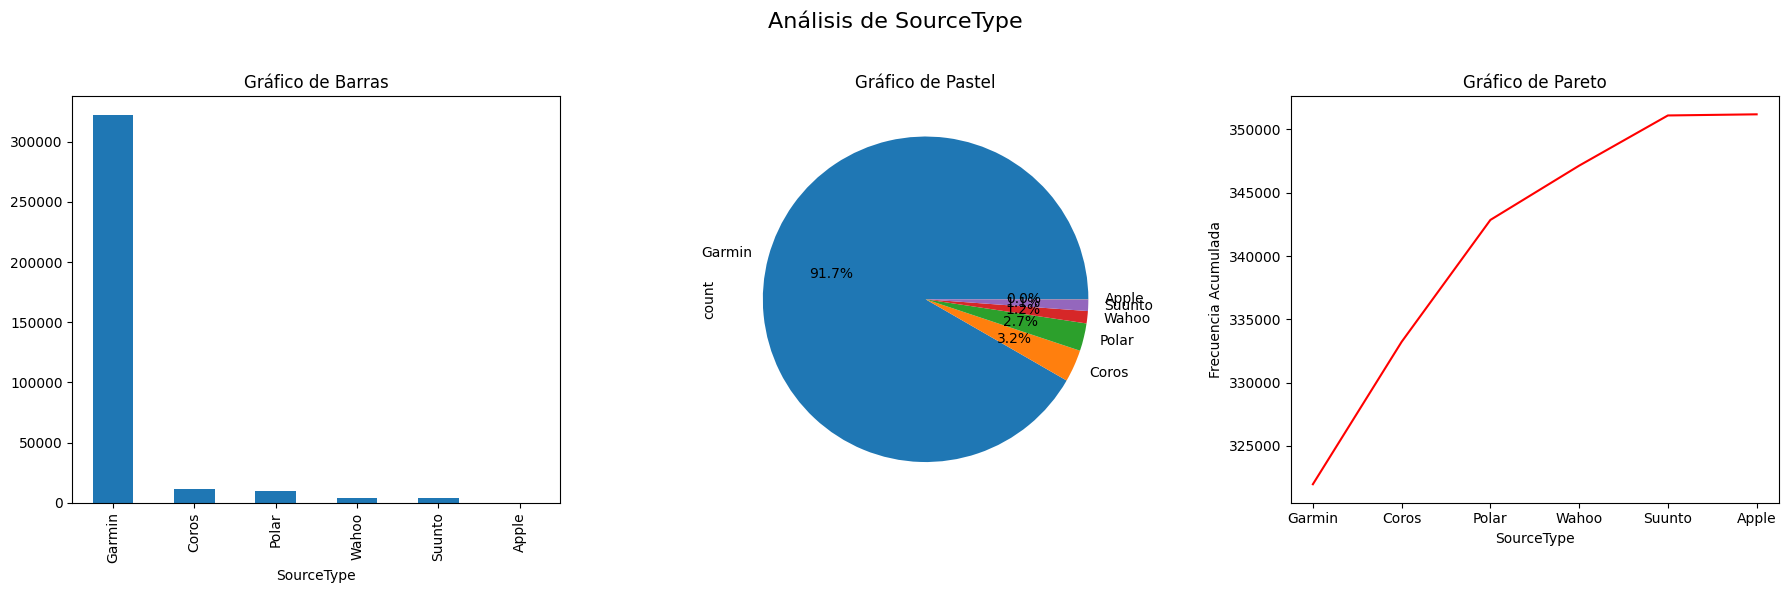

In [ ]:
# Calcular frecuencias absolutas, relativas y moda de la columna 'SourceType'
frecuencias_absolutas = df_running['SourceType'].value_counts()
frecuencias_relativas = df_running['SourceType'].value_counts(normalize=True)
moda = df_running['SourceType'].mode()[0]

print('\n-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')
print(f'Frecuencias absolutas:\n{frecuencias_absolutas}')
print(f'Frecuencias relativas:\n{frecuencias_relativas}')
print(f'Moda: {moda}')

# Crear una figura de matriz 1x3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Análisis de SourceType', fontsize=16)

# Gráfico de barras
frecuencias_absolutas.plot(kind='bar', ax=axes[0])
axes[0].set_title('Gráfico de Barras')

# Gráfico de pastel
frecuencias_absolutas.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Gráfico de Pastel')

# Gráfico de Pareto
frecuencias_absolutas.sort_values(ascending=False).cumsum().plot(kind='line', ax=axes[2], color='red')
axes[2].set_title('Gráfico de Pareto')
axes[2].set_ylabel('Frecuencia Acumulada')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **Interpretación de los resultados**

Las anteriores gráficas se generaron utilizando todos los registros debido a que solo existen 6 categorias o tipos de dispositivo, por lo que el procesamiento se realiza más rapidamente.

Podemos observar que el dataset presenta un sesgo debido a la mayor cantidad de datos provenientes del proveedor Garmin, lo que podría influir en la toma de decisiones al estar dominado por las características y mediciones de este dispositivo en particular.

Cabe resaltar que la baja cantidad de datos del dispositivo Apple se debe a que su integración es reciente, con solo unas semanas de uso, por lo que no es posible extraer conclusiones o realizar análisis confiables sobre este.

# **Conclusiones**

●	La gran mayoría de los datos provienen de Garmin (89.1%), lo que significa que cualquier modelo o conclusión extraída estará principalmente influenciada por Garmin. Esto podría deberse a una mayor popularidad de Garmin entre los usuarios o a un sesgo en la recolección de datos (por ejemplo, si la fuente de datos favorece a Garmin).

●	Solo Wahoo (3.34%), Polar (2.23%) y Coros (2.16%) tienen una presencia moderada.

●	Apple (0.03%) es casi inexistente en los datos, lo que podría indicar que este dataset no es adecuado para analizar su comportamiento.